In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('regression_dataset.csv')

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2005,1,2.16,5.3,2107.48
1,2005,2,2.41,5.4,2325.89
2,2005,3,2.63,5.2,2274.56
3,2005,4,2.78,5.1,2361.23
4,2005,5,3.21,5.0,2384.67


In [4]:
df.tail()

,year,month,interest_rate,unemployment_rate,index_price
487,2025,8,3.75,4.0,11456.23
488,2025,9,3.70,3.9,11534.56
489,2025,10,3.65,3.8,11645.34
490,2025,11,3.60,3.9,11756.45
491,2025,12,3.55,4.0,11867.56


In [6]:
# drop unecessary cols 
df.drop(columns=["year","month"],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.16,5.3,2107.48
1,2.41,5.4,2325.89
2,2.63,5.2,2274.56
3,2.78,5.1,2361.23
4,3.21,5.0,2384.67


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [10]:
##vizualization
import seaborn as sns

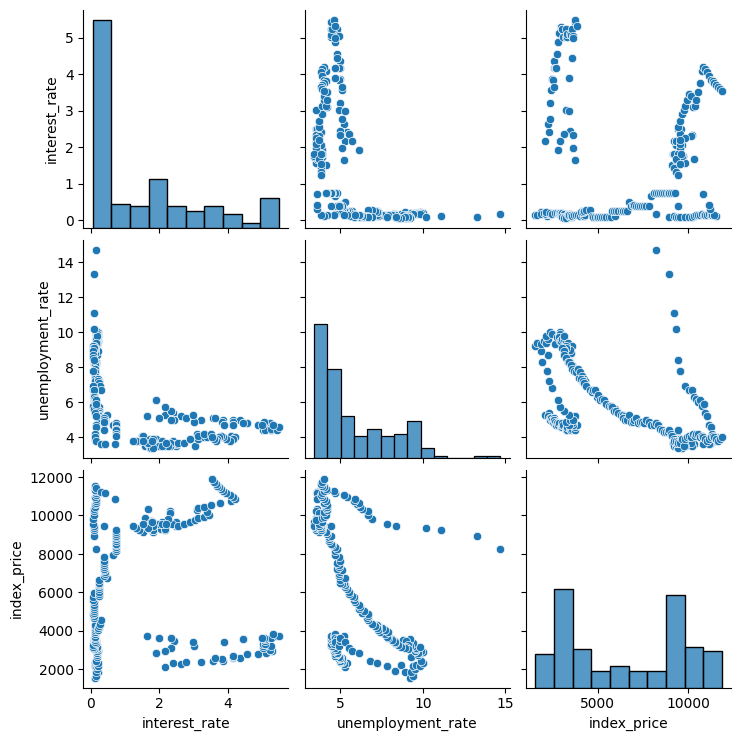

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.549159,0.062737
unemployment_rate,-0.549159,1.000000,-0.601030
index_price,0.062737,-0.601030,1.000000


Text(0, 0.5, 'unemployment Rate')

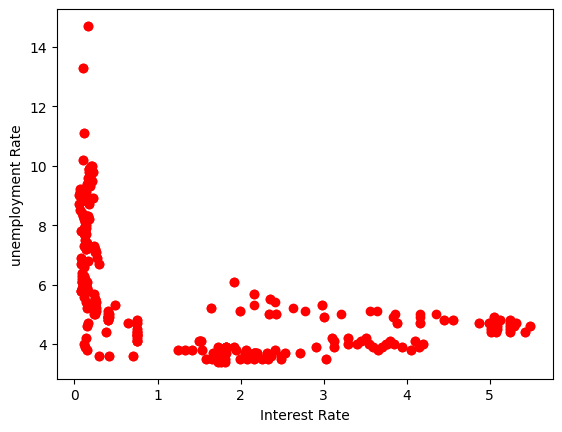

In [14]:
## vizualize more closely 
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Rate")

In [15]:
#independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
## train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X

,interest_rate,unemployment_rate
0,2.16,5.3
1,2.41,5.4
2,2.63,5.2
3,2.78,5.1
4,3.21,5.0
...,...,...
487,3.75,4.0
488,3.70,3.9
489,3.65,3.8
490,3.60,3.9


In [21]:
y

0       2107.48
1       2325.89
2       2274.56
3       2361.23
4       2384.67
         ...   
487    11456.23
488    11534.56
489    11645.34
490    11756.45
491    11867.56
Name: index_price, Length: 492, dtype: float64

<Axes: xlabel='interest_rate', ylabel='index_price'>

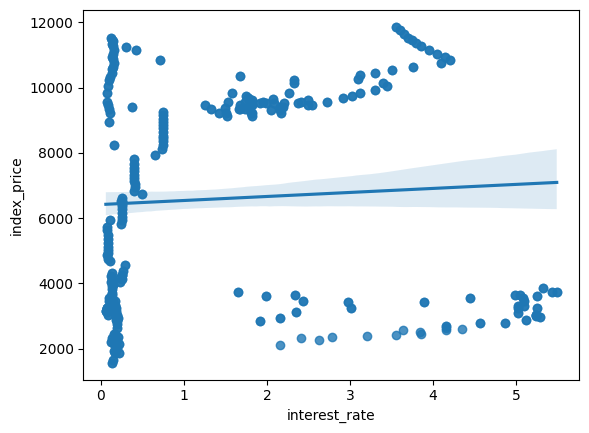

In [22]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

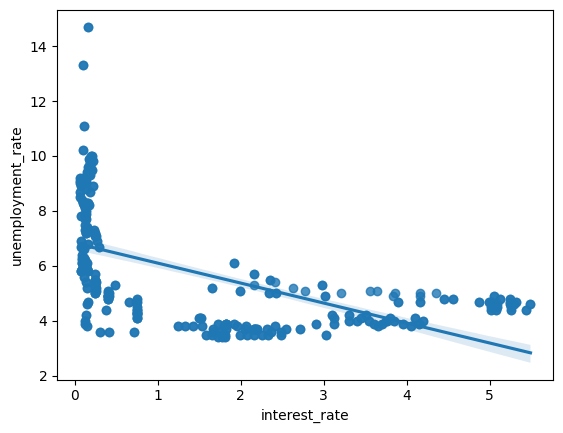

In [23]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

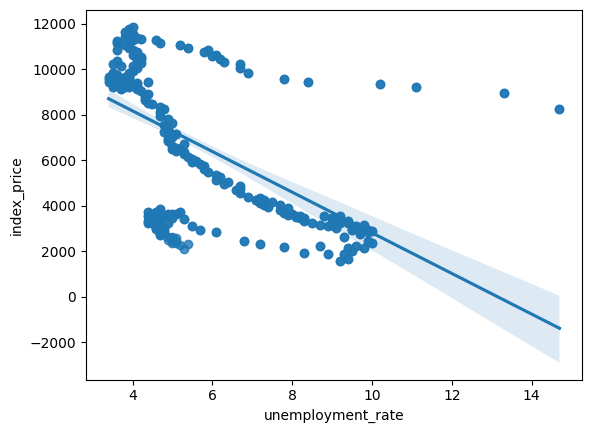

In [24]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

In [25]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.85427539,  1.57048422],
       [-0.7800314 ,  1.80381837],
       [ 2.18972832, -0.48285624],
       [-0.8233404 ,  0.96381545],
       [-0.7738444 ,  1.94381885],
       [-0.66247841, -0.62285672],
       [ 2.3938993 , -0.48285624],
       [-0.84808839,  0.03047888],
       [ 0.04902652, -0.9028577 ],
       [-0.8109664 ,  1.01048228],
       [ 1.67620737, -0.34285575],
       [ 0.96470243, -0.38952258],
       [-0.86046239,  1.5238174 ],
       [-0.59442142, -0.20285527],
       [-0.7985924 ,  0.03047888],
       [-0.7862184 ,  1.89715203],
       [-0.8171534 ,  0.96381545],
       [ 1.27405241, -0.71619038],
       [-0.7429094 , -0.20285527],
       [ 0.97707643, -1.04285818],
       [-0.8109664 ,  1.57048422],
       [-0.8047794 ,  0.17047936],
       [ 0.19751451, -1.08952501],
       [ 1.45347539, -0.76285721],
       [-0.85427539,  1.61715105],
       [ 1.42254039, -0.80952404],
       [ 0.07996152, -1.04285818],
       [-0.65010441, -0.38952258],
       [-0.8109664 ,

In [45]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [46]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
## crossval score 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [48]:
np.mean(validation_score)

np.float64(-5801885.161839311)

In [49]:
## predictions
y_pred = regression.predict(X_test)

In [50]:
y_pred

array([ 3569.49712415,  2881.06660067,  5330.58289692,  5099.11674861,
        2512.59000942,  9006.73569896,  5093.29308179,  7536.45242236,
        8902.38862784,  4964.3068841 ,  5566.11674416,  6513.46446046,
        3697.1163882 ,  7843.78112156,  7478.9276187 ,  2647.39987394,
        5091.92614815,  6996.93508272,  8016.35553255,  8185.08454989,
        3519.16292094,  7124.83222837,  9211.52887123,  6908.83633303,
        3449.06846055,  7065.21799891,  9227.72161634,  8390.21118007,
        9420.16743715,  3242.35259146,  4058.40237899,  3150.6863297 ,
        8573.37697464,  2987.11406335,  5598.44665807,  5549.86842273,
        6642.95084503,  5686.54540776,  9101.9694728 ,  8548.23766119,
        1132.16145039,  8269.78251647,  5742.59212514,  9101.9694728 ,
        8562.67443843,  8167.1358369 ,  5150.81788546,  6912.73730301,
        3519.16292094,  7090.35731236,  7291.74970151,  4482.59222971,
        8514.09620309,  6874.80602757,  9103.72544067,  8861.1121456 ,
      

In [51]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [52]:
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5359012.683550776
1678.9853889893204
2314.9541428613175


In [53]:
from sklearn.metrics import r2_score

In [54]:
score = r2_score(y_test,y_pred)

In [55]:
print(score)

0.4826817121167223


In [56]:
## adjusted r score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.47405974065200096

In [ ]:
## assumptions 

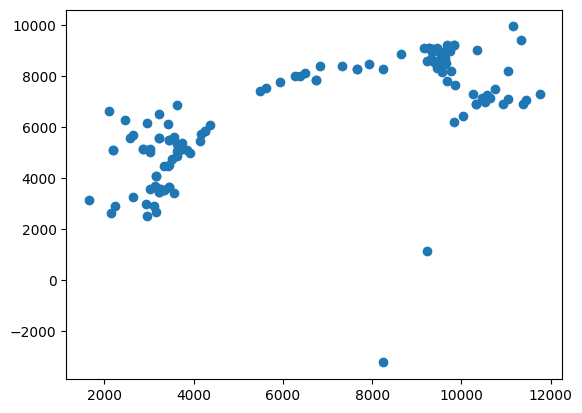

In [40]:
plt.scatter(y_test,y_pred)

In [41]:
residuals = y_test-y_pred
print(residuals)

78     -323.827124
55     -635.176601
272   -1691.662897
286   -2900.666749
63      433.079991
          ...     
320    -520.555923
22    -2315.308423
322    -901.622379
46    -2900.666749
31    -1412.131967
Name: index_price, Length: 123, dtype: float64


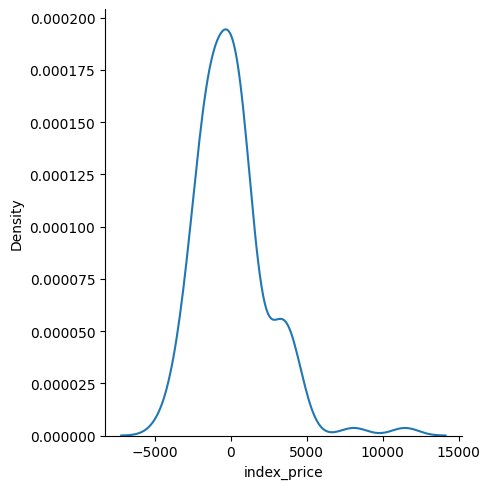

In [42]:
sns.displot(residuals,kind='kde')

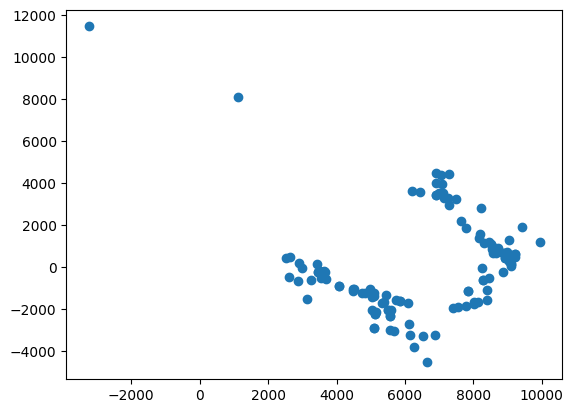

In [43]:
# scatter plot predictions and residuals
plt.scatter(y_pred,residuals)